In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import OneHotEncoder 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'Data.csv')
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [6]:
df['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [7]:
df['Favorite Music Genre'].value_counts()

Favorite Music Genre
Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [8]:
df['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
F    33
M    33
Name: count, dtype: int64

### convert male into 1 and female into 0

In [14]:
dic={'F':0,
      'M':1
        }

df['Gender']=df['Gender'].map(dic)
df['Gender'].value_counts()

Gender
0    33
1    33
Name: count, dtype: int64

In [3]:
x=df.drop(columns='Gender')
x.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,Cool,Rock,Vodka,7UP/Sprite
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi
2,Warm,Rock,Wine,Coca Cola/Pepsi
3,Warm,Folk/Traditional,Whiskey,Fanta
4,Cool,Rock,Vodka,Coca Cola/Pepsi


In [15]:
encoded_x=pd.get_dummies(x,columns=['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink'])
encoded_x.head()

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
1,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
3,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False


In [19]:
encoded_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Favorite Color_Cool                    66 non-null     bool 
 1   Favorite Color_Neutral                 66 non-null     bool 
 2   Favorite Color_Warm                    66 non-null     bool 
 3   Favorite Music Genre_Electronic        66 non-null     bool 
 4   Favorite Music Genre_Folk/Traditional  66 non-null     bool 
 5   Favorite Music Genre_Hip hop           66 non-null     bool 
 6   Favorite Music Genre_Jazz/Blues        66 non-null     bool 
 7   Favorite Music Genre_Pop               66 non-null     bool 
 8   Favorite Music Genre_R&B and soul      66 non-null     bool 
 9   Favorite Music Genre_Rock              66 non-null     bool 
 10  Favorite Beverage_Beer                 66 non-null     bool 
 11  Favorite Beverage_Doesn't drink   

In [16]:
y=df['Gender']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, y, test_size=0.2, random_state=42)

In [46]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = clf.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6428571428571429


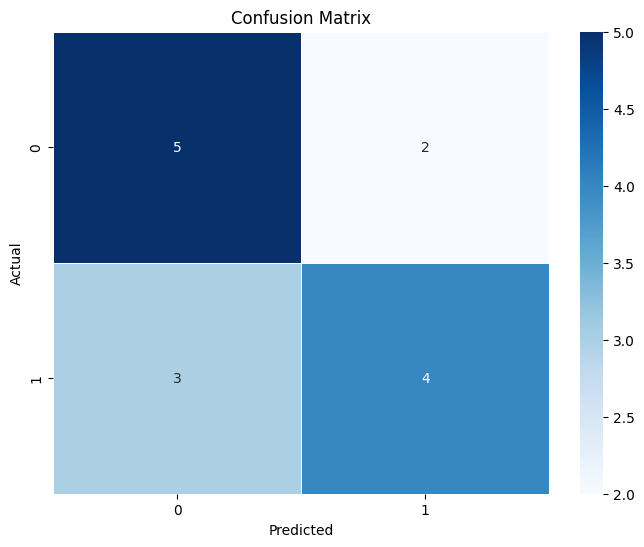

In [49]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
f1= f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

F1-Score: 0.6153846153846154
